In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand, plot
import math

from tabulate import tabulate  

***Метод Ньютона***

**1. ln(x), x є [1;10]**

Табличне задання функції:
x: 1.0000, y: 0.0000
x: 1.4737, y: 0.3878
x: 1.9474, y: 0.6665
x: 2.4211, y: 0.8842
x: 2.8947, y: 1.0629
x: 3.3684, y: 1.2144
x: 3.8421, y: 1.3460
x: 4.3158, y: 1.4623
x: 4.7895, y: 1.5664
x: 5.2632, y: 1.6607
x: 5.7368, y: 1.7469
x: 6.2105, y: 1.8262
x: 6.6842, y: 1.8997
x: 7.1579, y: 1.9682
x: 7.6316, y: 2.0323
x: 8.1053, y: 2.0925
x: 8.5789, y: 2.1493
x: 9.0526, y: 2.2031
x: 9.5263, y: 2.2541
x: 10.0000, y: 2.3026

Таблиця поділених різниць:
+---------+--------+--------+---------+--------+---------+--------+---------+--------+---------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|       x |   f(x) |   Δ^1y |    Δ^2y |   Δ^3y |    Δ^4y |   Δ^5y |    Δ^6y |   Δ^7y |    Δ^8y |   Δ^9y |   Δ^10y |   Δ^11y |   Δ^12y |   Δ^13y |   Δ^14y |   Δ^15y |   Δ^16y |   Δ^17y |   Δ^18y |   Δ^19y |
+=========+========+========+=========+========+=========+========+=========+========+=========+========+========

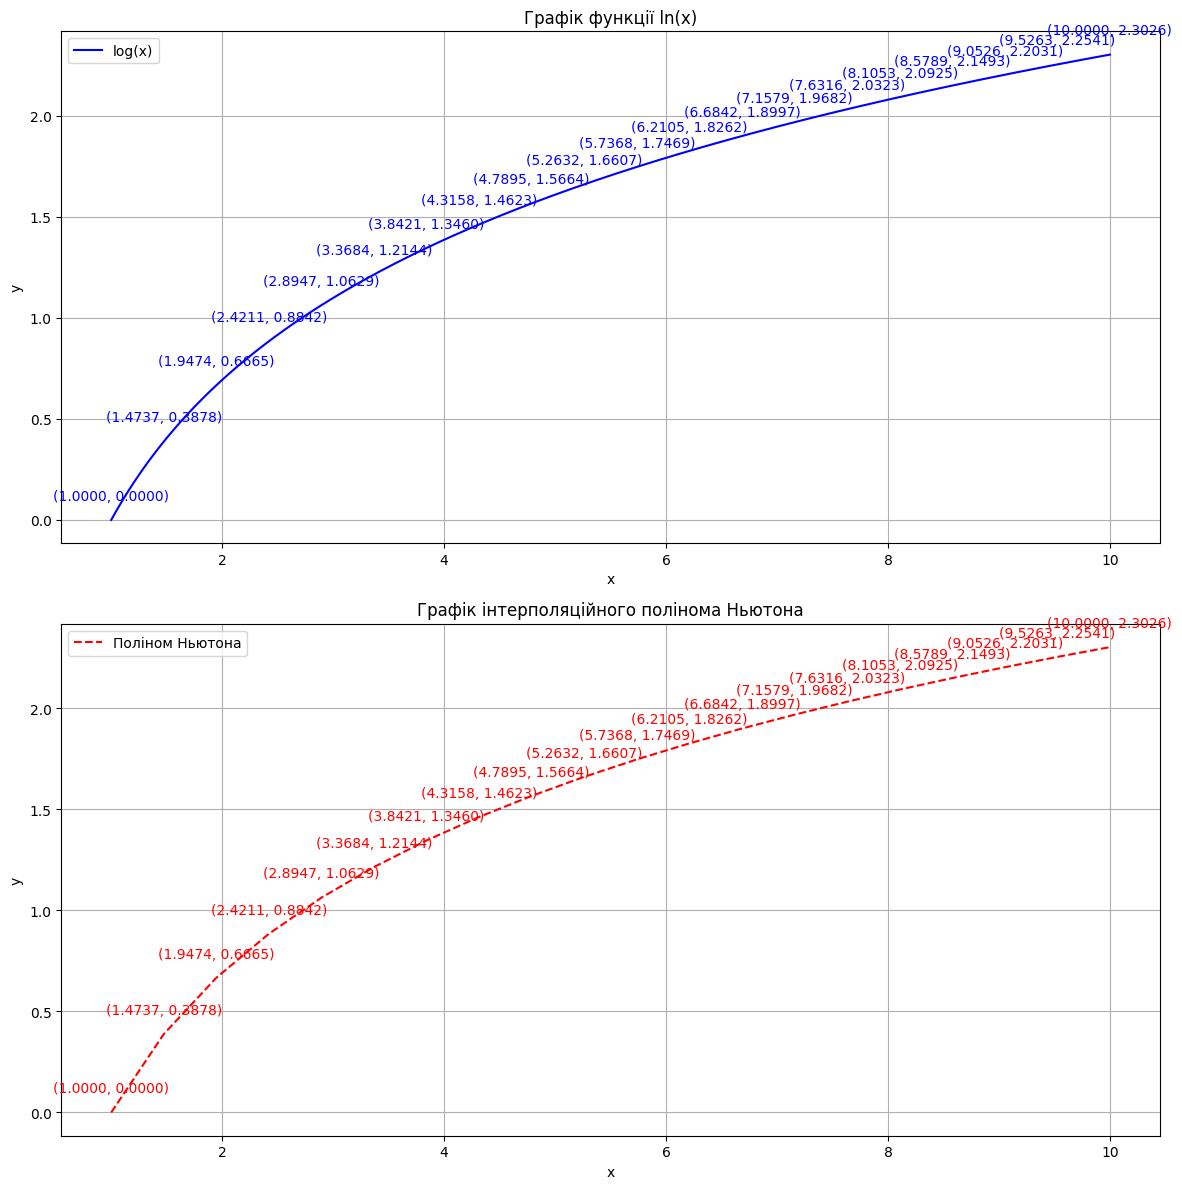

In [48]:
def format_number(number):
    """Форматує число з обмеженням до 4 знаків після коми."""
    return f"{number:.4f}"

def print_diff_table(X, Y, diffs):
    """Виводить таблицю поділених різниць у вигляді, як на скріншоті."""
    headers = ['x', 'f(x)']
    headers.extend([f'Δ^{i}y' for i in range(1, len(diffs))])

    rows = []
    for i in range(len(X)):
        row = [format_number(X[i]), format_number(Y[i])]
        for diff_level in range(1, len(diffs)):
            if i < len(diffs[diff_level]):
                row.append(format_number(diffs[diff_level][i]))
            else:
                row.append('')
        rows.append(row)
    
    print("\nТаблиця поділених різниць:")
    print(tabulate(rows, headers=headers, tablefmt='grid', stralign='right'))

def div_diff(X, Y):
    """Обчислює таблицю поділених різниць."""
    diffs = [Y.copy()]  
    for i in range(1, len(Y)):
        current_diff = []
        for j in range(len(diffs[-1]) - 1):
            diff_value = (diffs[-1][j + 1] - diffs[-1][j]) / (X[j + i] - X[j])
            current_diff.append(diff_value)
        diffs.append(current_diff)
    return diffs 

def newton(X, Y):
    """Будує поліном Ньютона з покроковим виведенням."""
    diffs = div_diff(X, Y)  
    coeffs = [row[0] for row in diffs]  
    x = symbols('x')
    poly = Y[0]  
    term = 1  

    print("\nФормування полінома Ньютона:")
    print(f"Початковий поліном: P(x) = {format_number(poly)}")  

    for i in range(1, len(X)):  
        term *= (x - X[i - 1])  
        new_term = coeffs[i] * term  
        poly += new_term 
        print(f"\nКрок {i}:")
        print(f"{format_number(coeffs[i])} * ({expand(term)})")
        print(f"  Поточний поліном: P(x) = {expand(poly)}")

    return expand(poly)

def create_table(func, a, b, points):
    """Створює таблицю значень функції на заданому інтервалі."""
    X = [a + i * (b - a) / (points - 1) for i in range(points)]
    Y = [func(x) for x in X]
    return X, Y

if __name__ == '__main__':
    def func(x):
        return math.log(x)  
    
    a = 1  # Початок інтервалу
    b = 10  # Кінець інтервалу
    points = 20  # Кількість точок
    
    # Створення таблиці
    X, Y = create_table(func, a, b, points)
    print("Табличне задання функції:")
    for xi, yi in zip(X, Y):
        print(f"x: {format_number(xi)}, y: {format_number(yi)}")
    diffs = div_diff(X, Y)
    print_diff_table(X, Y, diffs)
    n_pol = newton(X, Y)
    print('\nПоліном Ньютона:', n_pol)

    X_fine = np.linspace(a, b, 1000)
    Y_fine = np.log(X_fine)  
    X_poly = np.array(X)
    Y_poly = [float(n_pol.subs('x', xi)) for xi in X_poly]
    plt.figure(figsize=(12, 12)) 
    
    plt.subplot(2, 1, 1) 
    plt.plot(X_fine, Y_fine, label='log(x)', color='blue')
    plt.title("Графік функції ln(x)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    for xi, yi in zip(X, Y):
        plt.text(xi, yi + 0.1, f"({format_number(xi)}, {format_number(yi)})", fontsize=10, color='blue', ha='center')

    plt.subplot(2, 1, 2)
    plt.plot(X_poly, Y_poly, label='Поліном Ньютона', color='red', linestyle='--')
    plt.title("Графік інтерполяційного полінома Ньютона")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    for xi, yi in zip(X, Y):
        plt.text(xi, float(n_pol.subs('x', xi)) + 0.1, f"({format_number(xi)}, {format_number(float(n_pol.subs('x', xi)))})", fontsize=10, color='red', ha='center')


    plt.tight_layout()
    plt.show()


**2. sin x, x є [-pi;pi]**

Табличне задання функції:
x: -3.1416, y: -0.0000
x: -2.8109, y: -0.3247
x: -2.4802, y: -0.6142
x: -2.1495, y: -0.8372
x: -1.8188, y: -0.9694
x: -1.4881, y: -0.9966
x: -1.1574, y: -0.9158
x: -0.8267, y: -0.7357
x: -0.4960, y: -0.4759
x: -0.1653, y: -0.1646
x: 0.1653, y: 0.1646
x: 0.4960, y: 0.4759
x: 0.8267, y: 0.7357
x: 1.1574, y: 0.9158
x: 1.4881, y: 0.9966
x: 1.8188, y: 0.9694
x: 2.1495, y: 0.8372
x: 2.4802, y: 0.6142
x: 2.8109, y: 0.3247
x: 3.1416, y: 0.0000

Таблиця поділених різниць:
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|       x |    f(x) |    Δ^1y |    Δ^2y |    Δ^3y |    Δ^4y |    Δ^5y |    Δ^6y |    Δ^7y |    Δ^8y |    Δ^9y |   Δ^10y |   Δ^11y |   Δ^12y |   Δ^13y |   Δ^14y |   Δ^15y |   Δ^16y |   Δ^17y |   Δ^18y |   Δ^19y |
+=========+=========+=========+=========+=========+=========+=========+=========+=

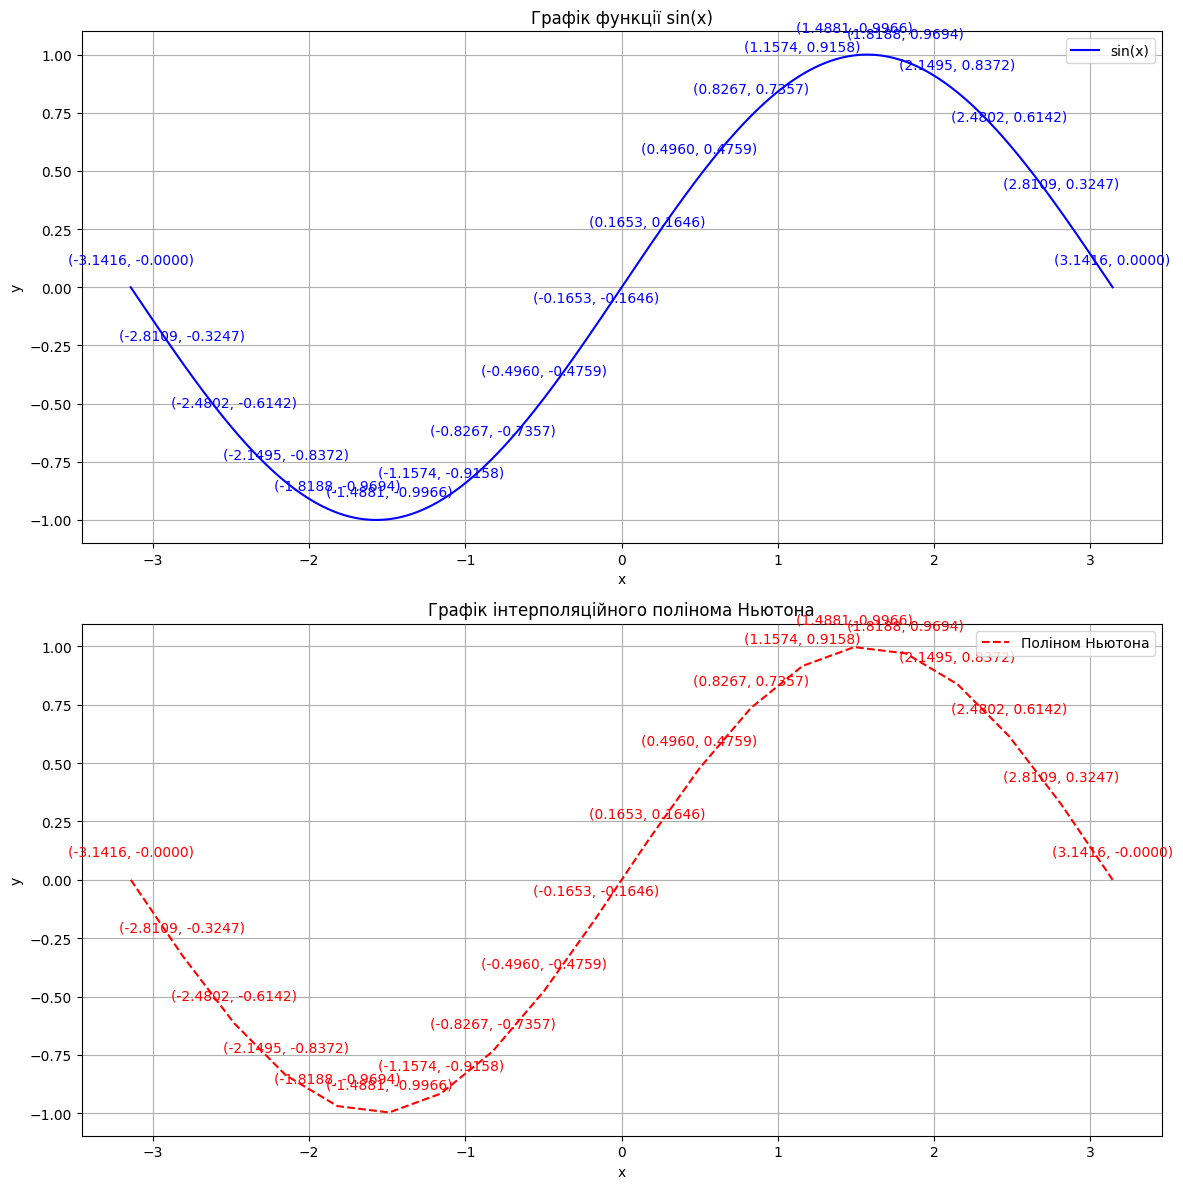

In [ ]:
if __name__ == '__main__':
    def func(x):
        return math.sin(x) 
    
    a = -math.pi  # Початок інтервалу (-π)
    b = math.pi  # Кінець інтервалу (π)
    points = 20  # Кількість точок
    
    X, Y = create_table(func, a, b, points)
    print("Табличне задання функції:")
    for xi, yi in zip(X, Y):
        print(f"x: {format_number(xi)}, y: {format_number(yi)}")
    diffs = div_diff(X, Y)
    
    print_diff_table(X, Y, diffs)
    
 
    n_pol = newton(X, Y)
    print('\nПоліном Ньютона:', n_pol)


    X_fine = np.linspace(a, b, 1000)
    Y_fine = np.sin(X_fine)  
    

    X_poly = np.array(X)
    Y_poly = [float(n_pol.subs('x', xi)) for xi in X_poly]
    

    plt.figure(figsize=(12, 12))  
    

    plt.subplot(2, 1, 1)  
    plt.plot(X_fine, Y_fine, label='sin(x)', color='blue')
    plt.title("Графік функції sin(x)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    for xi, yi in zip(X, Y):
        plt.text(xi, yi + 0.1, f"({format_number(xi)}, {format_number(yi)})", fontsize=10, color='blue', ha='center')


    plt.subplot(2, 1, 2)
    plt.plot(X_poly, Y_poly, label='Поліном Ньютона', color='red', linestyle='--')
    plt.title("Графік інтерполяційного полінома Ньютона")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    for xi, yi in zip(X, Y):
        plt.text(xi, float(n_pol.subs('x', xi)) + 0.1, f"({format_number(xi)}, {format_number(float(n_pol.subs('x', xi)))})", fontsize=10, color='red', ha='center')

    plt.tight_layout()
    plt.show()

***Природні кубічні сплайни***

**1. ln(x), x є [1;10]**

In [50]:
def natural_cubic_spline(x, y):
    """
    Обчислює коефіцієнти природного кубічного сплайну.
    """
    n = len(x) - 1 
    
    h = np.diff(x)
    print("\nh (довжини сегментів):", h)
    
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    A[0, 0] = 1
    A[n, n] = 1
    
    print("\nМатриця A:")
    print(A)
    print("\nВектор b:")
    print(b)

    c = np.linalg.solve(A, b)
    print("\nКоефіцієнти c:")
    print(c)
    
    a = y[:-1]
    d = np.zeros(n)
    b = np.zeros(n)
    
    print("\nОбчислення коефіцієнтів a, b, d:")
    for i in range(n):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        print(f"\nДля сегменту [{x[i]:.2f}, {x[i+1]:.2f}]:")
        print(f"a[{i}] = {a[i]:.6f}")
        print(f"b[{i}] = {b[i]:.6f}")
        print(f"d[{i}] = {d[i]:.6f}")
    print("\nКоефіцієнти природного кубічного сплайну:")
    print("----------------------------------------")
    for i in range(n):
        print(f"\nСплайн {i+1} на відрізку [{x[i]:.2f}, {x[i+1]:.2f}]:")
        print(f"S{i+1}(x) = {a[i]:.6f} + {b[i]:.6f}(x - {x[i]}) + {c[i]:.6f}(x - {x[i]})² + {d[i]:.6f}(x - {x[i]})³")
    
    return a, b, c[:-1], d

def evaluate_spline(x_points, x, a, b, c, d):
    """
    Обчислює значення сплайну в заданих точках.
    """
    y_points = np.zeros_like(x_points)
    
    for i in range(len(x_points)):
        idx = np.searchsorted(x, x_points[i]) - 1
        idx = max(0, min(idx, len(a)-1))
        dx = x_points[i] - x[idx]
        y_points[i] = a[idx] + b[idx]*dx + c[idx]*dx**2 + d[idx]*dx**3
        
    return y_points

def print_spline_values(x_points, y_points, num_points=10):
    """
    Виводить значення сплайну в заданих точках.
    """
    print("\nЗначення сплайну в контрольних точках:")
    print("----------------------------------------")
    step = max(1, len(x_points) // num_points)
    for i in range(0, len(x_points), step):
        print(f"x = {x_points[i]:6.2f} | y = {y_points[i]:6.2f}")

def generate_points(func, a, b, n):
    """
    Генерує точки на основі заданої функції та меж інтервалу.
    """
    x = np.linspace(a, b, n)
    y = func(x)
    return x, y

def print_table(x, y):
    """
    Виводить таблицю значень x та y.
    """
    print("\nТаблиця значень функції:")
    print("----------------------------------------")
    print("   i   |     x     |     y     ")
    print("----------------------------------------")
    for i in range(len(x)):
        print(f"  {i:2d}   | {x[i]:9.4f} | {y[i]:9.4f}")

# Приклад використання
if __name__ == "__main__":
    def test_function(x):
        return np.log(x)
    
    # Параметри інтерполяції
    a = 1  # ліва межа інтервалу
    b = 10  # права межа інтервалу
    n = 20  # кількість точок інтерполяції
    
    x, y = generate_points(test_function, a, b, n)
    
    print_table(x, y)

    a_coef, b_coef, c_coef, d_coef = natural_cubic_spline(x, y)
    
    x_new = np.linspace(a, b, 200)
    y_new = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef)
    

    print_spline_values(x_new, y_new)
    



Таблиця значень функції:
----------------------------------------
   i   |     x     |     y     
----------------------------------------
   0   |    1.0000 |    0.0000
   1   |    1.4737 |    0.3878
   2   |    1.9474 |    0.6665
   3   |    2.4211 |    0.8842
   4   |    2.8947 |    1.0629
   5   |    3.3684 |    1.2144
   6   |    3.8421 |    1.3460
   7   |    4.3158 |    1.4623
   8   |    4.7895 |    1.5664
   9   |    5.2632 |    1.6607
  10   |    5.7368 |    1.7469
  11   |    6.2105 |    1.8262
  12   |    6.6842 |    1.8997
  13   |    7.1579 |    1.9682
  14   |    7.6316 |    2.0323
  15   |    8.1053 |    2.0925
  16   |    8.5789 |    2.1493
  17   |    9.0526 |    2.2031
  18   |    9.5263 |    2.2541
  19   |   10.0000 |    2.3026

h (довжини сегментів): [0.47368421 0.47368421 0.47368421 0.47368421 0.47368421 0.47368421
 0.47368421 0.47368421 0.47368421 0.47368421 0.47368421 0.47368421
 0.47368421 0.47368421 0.47368421 0.47368421 0.47368421 0.47368421
 0.47368421]

М

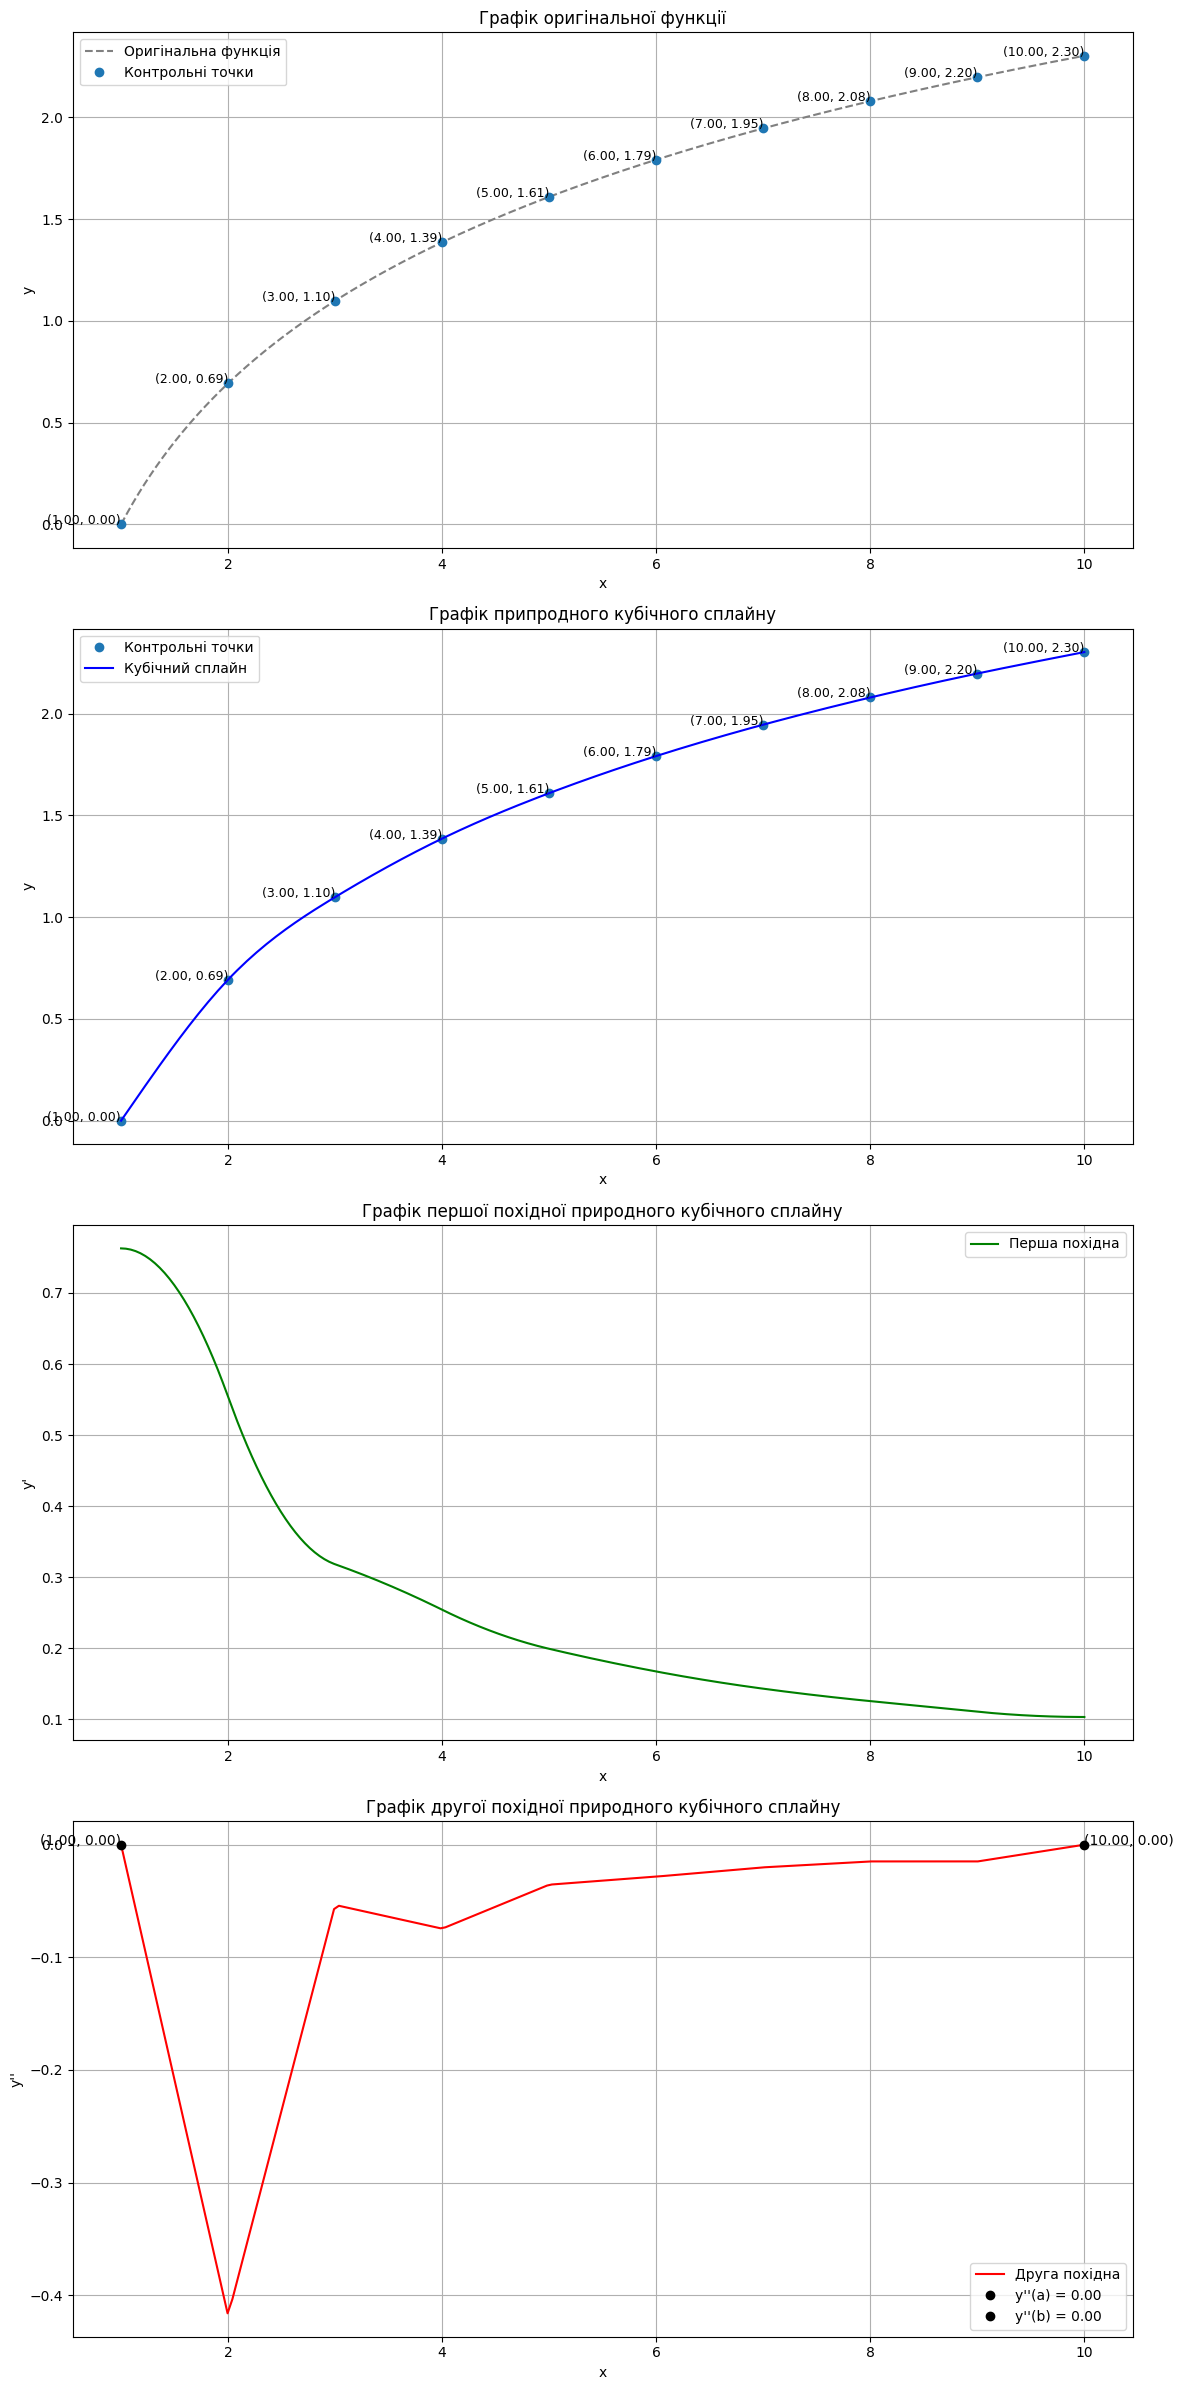

In [51]:
def natural_cubic_spline(x, y):
    n = len(x) - 1
    h = np.diff(x)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Заміна граничних умов на рівність перших похідних на межах
    A[0, 0] = 1
    A[n, n] = 1
    A[0, 1] = 0  # Встановлення умови для похідної на лівому кінці
    A[n, n-1] = 0  # Встановлення умови для похідної на правому кінці

    # Розв'язок системи
    c = np.linalg.solve(A, b)

    a = y[:-1]
    d = np.zeros(n)
    b = np.zeros(n)

    for i in range(n):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3

    return a, b, c[:-1], d

def evaluate_spline(x_points, x, a, b, c, d, derivative=0):
    y_points = np.zeros_like(x_points)
    for i in range(len(x_points)):
        idx = np.searchsorted(x, x_points[i]) - 1
        idx = max(0, min(idx, len(a)-1))
        dx = x_points[i] - x[idx]
        if derivative == 0:
            y_points[i] = a[idx] + b[idx]*dx + c[idx]*dx**2 + d[idx]*dx**3
        elif derivative == 1:
            y_points[i] = b[idx] + 2*c[idx]*dx + 3*d[idx]*dx**2
        elif derivative == 2:
            y_points[i] = 2*c[idx] + 6*d[idx]*dx
    return y_points

def generate_points(func, a, b, n):
    x = np.linspace(a, b, n)
    y = func(x)
    return x, y

if __name__ == "__main__":
    def test_function(x):
        return np.log(x)

    a, b, n = 1, 10, 10
    x, y = generate_points(test_function, a, b, n)

    a_coef, b_coef, c_coef, d_coef = natural_cubic_spline(x, y)
    x_new = np.linspace(a, b, 200)
    y_new = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef)
    y_new_prime = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef, derivative=1)
    y_new_double_prime = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef, derivative=2)

    fig, axs = plt.subplots(4, 1, figsize=(12, 24))

    x_orig = np.linspace(a, b, 1000)
    y_orig = test_function(x_orig)

    # Графік 1: Початкова функція
    axs[0].plot(x_orig, y_orig, '--', label='Оригінальна функція', color='gray')
    axs[0].plot(x, y, 'o', label='Контрольні точки')

    for i in range(len(x)):
        axs[0].text(x[i], y[i], f"({x[i]:.2f}, {y[i]:.2f})", fontsize=9, ha='right')

    axs[0].set_title('Графік оригінальної функції')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].grid(True)
    axs[0].legend()

    # Графік 2: Кубічний сплайн
    axs[1].plot(x, y, 'o', label='Контрольні точки')
    axs[1].plot(x_new, y_new, '-', label='Кубічний сплайн', color='blue')

    for i in range(len(x)):
        axs[1].text(x[i], y[i], f"({x[i]:.2f}, {y[i]:.2f})", fontsize=9, ha='right')

    axs[1].set_title('Графік припродного кубічного сплайну')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].grid(True)
    axs[1].legend()

    # Графік 3: Перша похідна
    axs[2].plot(x_new, y_new_prime, '-', label="Перша похідна", color='green')
    axs[2].set_title('Графік першої похідної природного кубічного сплайну')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y\'')
    axs[2].grid(True)
    axs[2].legend()

    # Графік 4: Друга похідна
    axs[3].plot(x_new, y_new_double_prime, '-', label="Друга похідна", color='red')
    
    # Значення другої похідної в точках a та b
    second_derivative_a = evaluate_spline(np.array([a]), x, a_coef, b_coef, c_coef, d_coef, derivative=2)[0]
    second_derivative_b = evaluate_spline(np.array([b]), x, a_coef, b_coef, c_coef, d_coef, derivative=2)[0]
    
    axs[3].plot(a, second_derivative_a, 'ko', label=f'y\'\'(a) = {second_derivative_a:.2f}')
    axs[3].plot(b, second_derivative_b, 'ko', label=f'y\'\'(b) = {second_derivative_b:.2f}')
    axs[3].text(a, second_derivative_a, f"({a:.2f}, {second_derivative_a:.2f})", fontsize=10, color='black', ha='right')
    axs[3].text(b, second_derivative_b, f"({b:.2f}, {second_derivative_b:.2f})", fontsize=10, color='black', ha='left')

    axs[3].set_title('Графік другої похідної природного кубічного сплайну')
    axs[3].set_xlabel('x')
    axs[3].set_ylabel('y\'\'')
    axs[3].grid(True)
    axs[3].legend()

    plt.tight_layout()
    plt.show()


**2. sin x, x є [-pi;pi]**

In [ ]:

def natural_cubic_spline(x, y):
    """
    Обчислює коефіцієнти природного кубічного сплайну.
    """
    n = len(x) - 1  # кількість сегментів
    
    # Обчислення h_i = x[i+1] - x[i]
    h = np.diff(x)
    print("\nh (довжини сегментів):", h)
    
    # Формування матриці системи для знаходження коефіцієнтів c
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    # Заповнення матриці A та вектора b
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    # Граничні умови для природного сплайну
    A[0, 0] = 1
    A[n, n] = 1
    
    print("\nМатриця A:")
    print(A)
    print("\nВектор b:")
    print(b)
    
    # Розв'язання системи для знаходження коефіцієнтів c
    c = np.linalg.solve(A, b)
    print("\nКоефіцієнти c:")
    print(c)
    
    # Обчислення коефіцієнтів a, b та d
    a = y[:-1]
    d = np.zeros(n)
    b = np.zeros(n)
    
    print("\nОбчислення коефіцієнтів a, b, d:")
    for i in range(n):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        print(f"\nДля сегменту [{x[i]:.2f}, {x[i+1]:.2f}]:")
        print(f"a[{i}] = {a[i]:.6f}")
        print(f"b[{i}] = {b[i]:.6f}")
        print(f"d[{i}] = {d[i]:.6f}")
    
    # Виведення коефіцієнтів у консоль
    print("\nКоефіцієнти природного кубічного сплайну:")
    print("----------------------------------------")
    for i in range(n):
        print(f"\nСплайн {i+1} на відрізку [{x[i]:.2f}, {x[i+1]:.2f}]:")
        print(f"S{i+1}(x) = {a[i]:.6f} + {b[i]:.6f}(x - {x[i]}) + {c[i]:.6f}(x - {x[i]})² + {d[i]:.6f}(x - {x[i]})³")
    
    return a, b, c[:-1], d

def evaluate_spline(x_points, x, a, b, c, d):
    """
    Обчислює значення сплайну в заданих точках.
    """
    y_points = np.zeros_like(x_points)
    
    for i in range(len(x_points)):
        idx = np.searchsorted(x, x_points[i]) - 1
        idx = max(0, min(idx, len(a)-1))
        dx = x_points[i] - x[idx]
        y_points[i] = a[idx] + b[idx]*dx + c[idx]*dx**2 + d[idx]*dx**3
        
    return y_points

def print_spline_values(x_points, y_points, num_points=10):
    """
    Виводить значення сплайну в заданих точках.
    """
    print("\nЗначення сплайну в контрольних точках:")
    print("----------------------------------------")
    step = max(1, len(x_points) // num_points)
    for i in range(0, len(x_points), step):
        print(f"x = {x_points[i]:6.2f} | y = {y_points[i]:6.2f}")

def generate_points(func, a, b, n):
    """
    Генерує точки на основі заданої функції та меж інтервалу.
    """
    x = np.linspace(a, b, n)
    y = func(x)
    return x, y

def print_table(x, y):
    """
    Виводить таблицю значень x та y.
    """
    print("\nТаблиця значень функції:")
    print("----------------------------------------")
    print("   i   |     x     |     y     ")
    print("----------------------------------------")
    for i in range(len(x)):
        print(f"  {i:2d}   | {x[i]:9.4f} | {y[i]:9.4f}")

# Приклад використання
if __name__ == "__main__":
    def test_function(x):
        return np.sin(x)
    
    # Параметри інтерполяції
    a = -3.1416  # ліва межа інтервалу
    b = 3.1416  # права межа інтервалу
    n = 20  # кількість точок інтерполяції
    
    # Генерація точок
    x, y = generate_points(test_function, a, b, n)
    
    # Виведення таблиці значень
    print_table(x, y)
    
    # Обчислення коефіцієнтів сплайну
    a_coef, b_coef, c_coef, d_coef = natural_cubic_spline(x, y)
    
    # Створення точок для побудови графіка
    x_new = np.linspace(a, b, 200)
    y_new = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef)
    
    # Виведення значень сплайну
    print_spline_values(x_new, y_new)


Таблиця значень функції:
----------------------------------------
   i   |     x     |     y     
----------------------------------------
   0   |   -3.1416 |    0.0000
   1   |   -2.8109 |   -0.3247
   2   |   -2.4802 |   -0.6142
   3   |   -2.1495 |   -0.8372
   4   |   -1.8188 |   -0.9694
   5   |   -1.4881 |   -0.9966
   6   |   -1.1574 |   -0.9158
   7   |   -0.8267 |   -0.7357
   8   |   -0.4960 |   -0.4759
   9   |   -0.1653 |   -0.1646
  10   |    0.1653 |    0.1646
  11   |    0.4960 |    0.4759
  12   |    0.8267 |    0.7357
  13   |    1.1574 |    0.9158
  14   |    1.4881 |    0.9966
  15   |    1.8188 |    0.9694
  16   |    2.1495 |    0.8372
  17   |    2.4802 |    0.6142
  18   |    2.8109 |    0.3247
  19   |    3.1416 |   -0.0000

h (довжини сегментів): [0.33069474 0.33069474 0.33069474 0.33069474 0.33069474 0.33069474
 0.33069474 0.33069474 0.33069474 0.33069474 0.33069474 0.33069474
 0.33069474 0.33069474 0.33069474 0.33069474 0.33069474 0.33069474
 0.33069474]

М

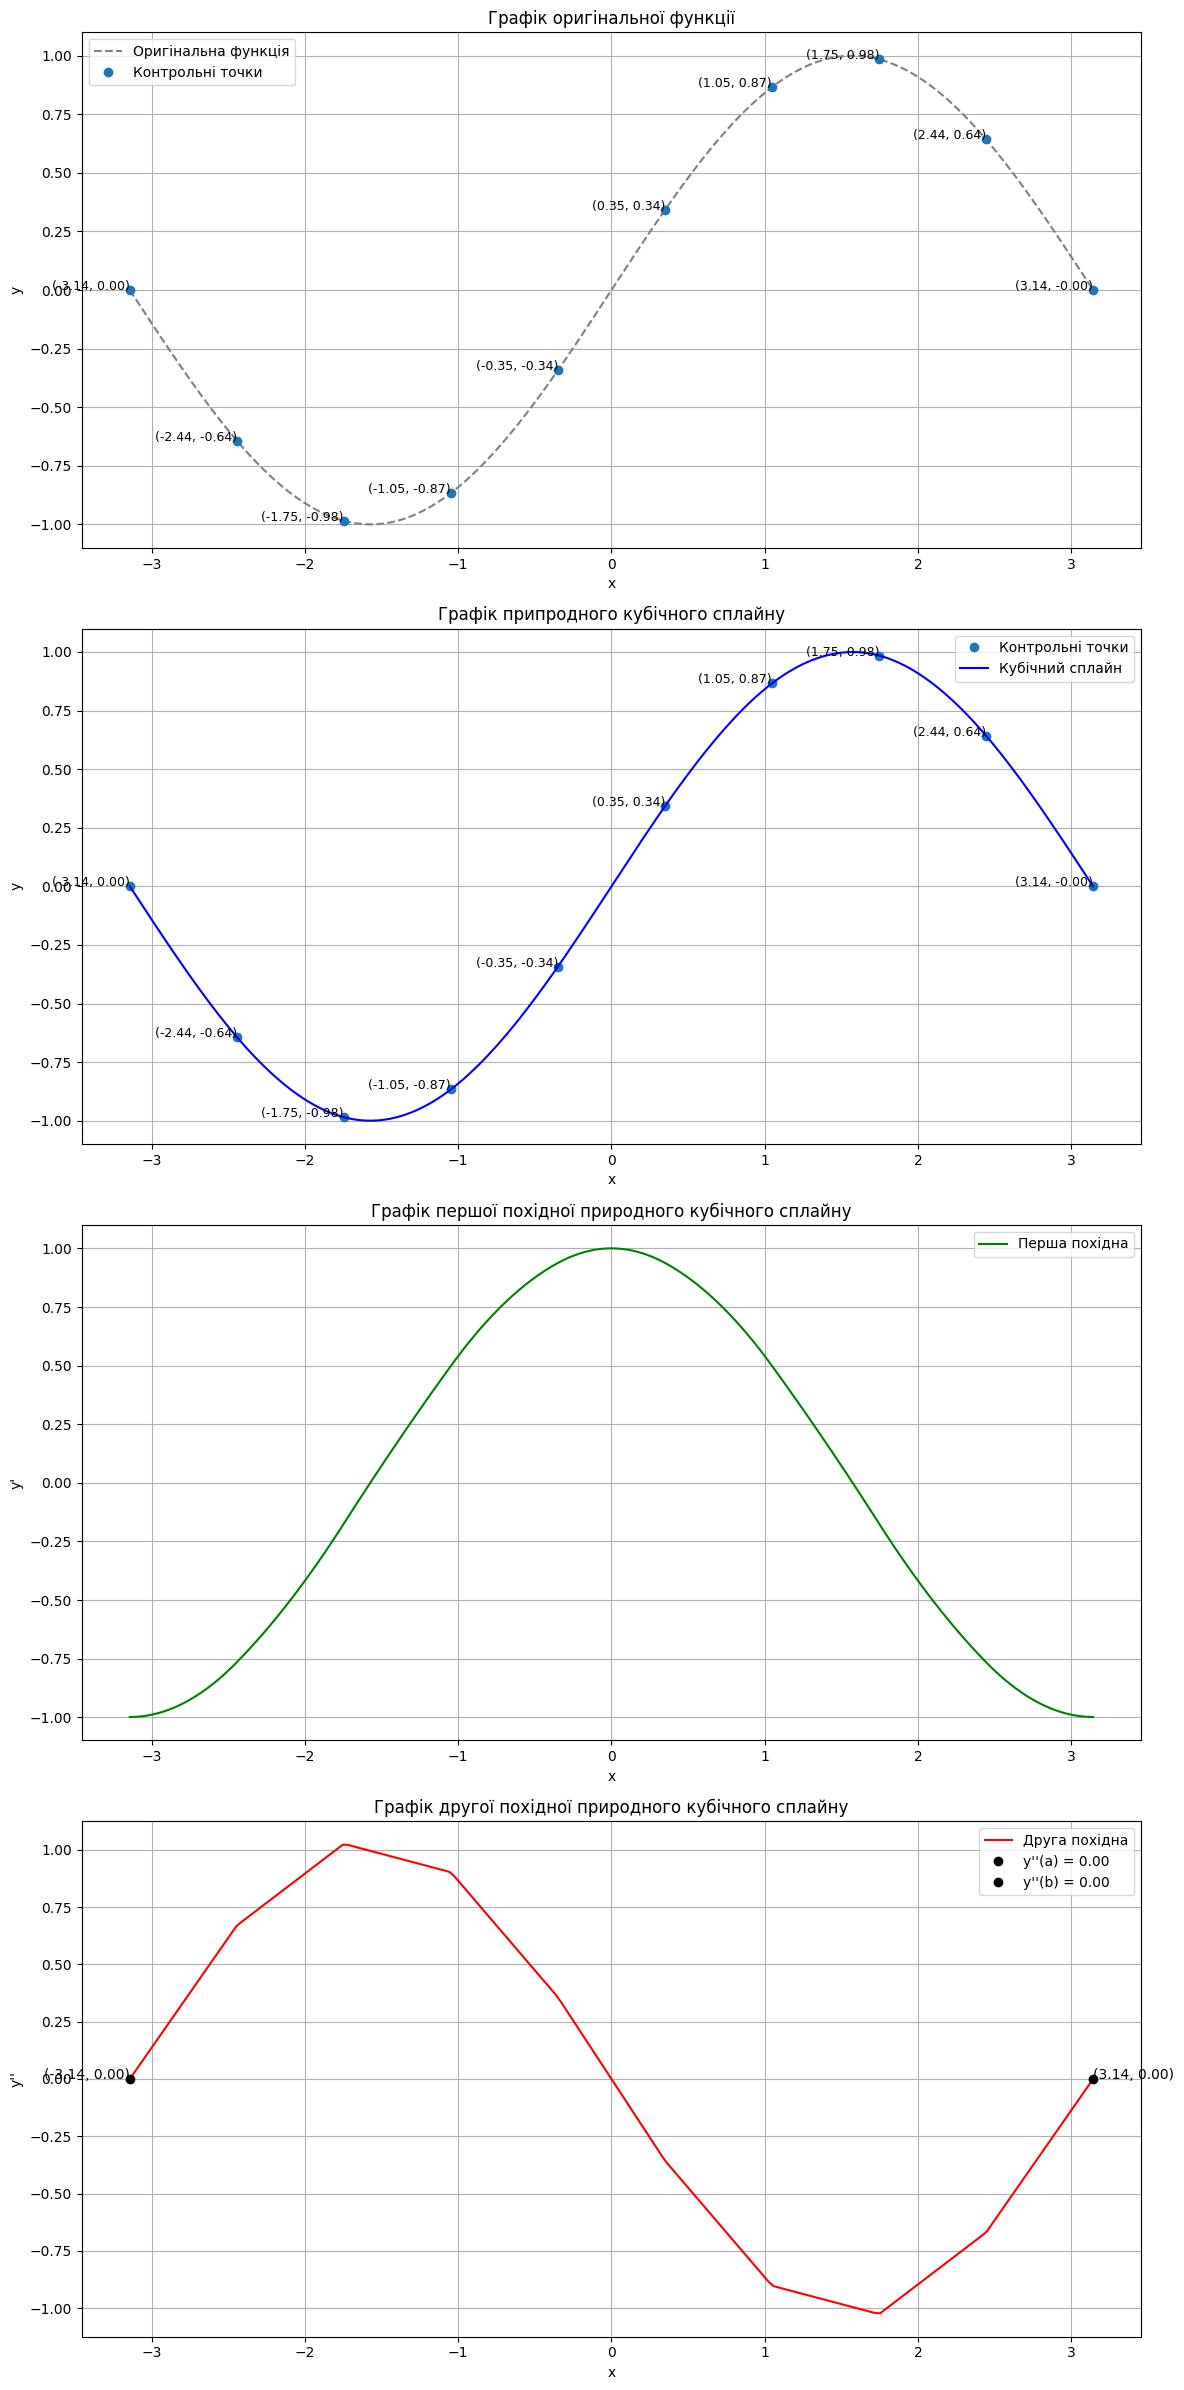

In [55]:

def natural_cubic_spline(x, y):
    n = len(x) - 1
    h = np.diff(x)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Заміна граничних умов на рівність перших похідних на межах
    A[0, 0] = 1
    A[n, n] = 1
    A[0, 1] = 0  # Встановлення умови для похідної на лівому кінці
    A[n, n-1] = 0  # Встановлення умови для похідної на правому кінці

    # Розв'язок системи
    c = np.linalg.solve(A, b)

    a = y[:-1]
    d = np.zeros(n)
    b = np.zeros(n)

    for i in range(n):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3

    return a, b, c[:-1], d

def evaluate_spline(x_points, x, a, b, c, d, derivative=0):
    y_points = np.zeros_like(x_points)
    for i in range(len(x_points)):
        idx = np.searchsorted(x, x_points[i]) - 1
        idx = max(0, min(idx, len(a)-1))
        dx = x_points[i] - x[idx]
        if derivative == 0:
            y_points[i] = a[idx] + b[idx]*dx + c[idx]*dx**2 + d[idx]*dx**3
        elif derivative == 1:
            y_points[i] = b[idx] + 2*c[idx]*dx + 3*d[idx]*dx**2
        elif derivative == 2:
            y_points[i] = 2*c[idx] + 6*d[idx]*dx
    return y_points

def generate_points(func, a, b, n):
    x = np.linspace(a, b, n)
    y = func(x)
    return x, y

if __name__ == "__main__":
    def test_function(x):
        return np.sin(x)

    a, b, n = -3.1416, 3.1416, 10
    x, y = generate_points(test_function, a, b, n)

    a_coef, b_coef, c_coef, d_coef = natural_cubic_spline(x, y)
    x_new = np.linspace(a, b, 200)
    y_new = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef)
    y_new_prime = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef, derivative=1)
    y_new_double_prime = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef, derivative=2)

    fig, axs = plt.subplots(4, 1, figsize=(12, 24))

    x_orig = np.linspace(a, b, 1000)
    y_orig = test_function(x_orig)

    # Графік 1: Початкова функція
    axs[0].plot(x_orig, y_orig, '--', label='Оригінальна функція', color='gray')
    axs[0].plot(x, y, 'o', label='Контрольні точки')

    for i in range(len(x)):
        axs[0].text(x[i], y[i], f"({x[i]:.2f}, {y[i]:.2f})", fontsize=9, ha='right')

    axs[0].set_title('Графік оригінальної функції')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].grid(True)
    axs[0].legend()

    # Графік 2: Кубічний сплайн
    axs[1].plot(x, y, 'o', label='Контрольні точки')
    axs[1].plot(x_new, y_new, '-', label='Кубічний сплайн', color='blue')

    for i in range(len(x)):
        axs[1].text(x[i], y[i], f"({x[i]:.2f}, {y[i]:.2f})", fontsize=9, ha='right')

    axs[1].set_title('Графік припродного кубічного сплайну')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].grid(True)
    axs[1].legend()

    # Графік 3: Перша похідна
    axs[2].plot(x_new, y_new_prime, '-', label="Перша похідна", color='green')
    axs[2].set_title('Графік першої похідної природного кубічного сплайну')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y\'')
    axs[2].grid(True)
    axs[2].legend()

    # Графік 4: Друга похідна
    axs[3].plot(x_new, y_new_double_prime, '-', label="Друга похідна", color='red')
    
    # Значення другої похідної в точках a та b
    second_derivative_a = evaluate_spline(np.array([a]), x, a_coef, b_coef, c_coef, d_coef, derivative=2)[0]
    second_derivative_b = evaluate_spline(np.array([b]), x, a_coef, b_coef, c_coef, d_coef, derivative=2)[0]
    
    axs[3].plot(a, second_derivative_a, 'ko', label=f'y\'\'(a) = {second_derivative_a:.2f}')
    axs[3].plot(b, second_derivative_b, 'ko', label=f'y\'\'(b) = {second_derivative_b:.2f}')
    axs[3].text(a, second_derivative_a, f"({a:.2f}, {second_derivative_a:.2f})", fontsize=10, color='black', ha='right')
    axs[3].text(b, second_derivative_b, f"({b:.2f}, {second_derivative_b:.2f})", fontsize=10, color='black', ha='left')

    axs[3].set_title('Графік другої похідної природного кубічного сплайну')
    axs[3].set_xlabel('x')
    axs[3].set_ylabel('y\'\'')
    axs[3].grid(True)
    axs[3].legend()

    plt.tight_layout()
    plt.show()
